## An exploration of the Titanic Kaggle Dataset

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('train.csv')

print data.head()
print data.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
       P

In [105]:
## Check for null values, fill in null age values

print data.isnull().sum()

data["Age"] = data["Age"].fillna(data["Age"].median())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [38]:
data.groupby(['Pclass','Sex',data.Age>15]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex    Age                                                           
1      female False   474.666667  0.666667  10.333333  0.666667  1.666667   
              True    469.032967  0.978022  34.758242  0.549451  0.417582   
       male   False   518.333333  1.000000   5.306667  0.666667  2.000000   
              True    454.151261  0.352941  39.844538  0.302521  0.235294   
2      female False   395.600000  1.000000   6.600000  0.700000  1.300000   
              True    450.303030  0.909091  32.053030  0.454545  0.500000   
       male   False   463.555556  1.000000   2.258889  0.888889  1.222222   
              True    446.545455  0.080808  33.080808  0.292929  0.131313   
3      female False   416.700000  0.533333   7.100000  1.533333  1.100000   
              True    395.263158  0.491228  27.907895  0.728070  0.719298   
       male   False   436.250000  0.321429   6.515000  2.821429  1.321429   
              True    457.206897  0.119122  28.702194  0.294671  0.128527   

                           Fare  
Pclass Sex    Age                
1      female False  160.962500  
              True   104.317995  
       male   False  117.802767  
              True    65.951086  
2      female False   29.240000  
              True    20.868624  
       male   False   27.306022  
              True    19.054124  
3      female False   19.023753  
              True    15.354351  
       male   False   27.716371  
              True    11.340213

In [39]:
data.groupby(['Pclass','Sex',data.Age>15]).count()

PassengerId  Survived  Name  Age  SibSp  Parch  Ticket  \
Pclass Sex    Age                                                             
1      female False            3         3     3    3      3      3       3   
              True            91        91    91   91     91     91      91   
       male   False            3         3     3    3      3      3       3   
              True           119       119   119  119    119    119     119   
2      female False           10        10    10   10     10     10      10   
              True            66        66    66   66     66     66      66   
       male   False            9         9     9    9      9      9       9   
              True            99        99    99   99     99     99      99   
3      female False           30        30    30   30     30     30      30   
              True           114       114   114  114    114    114     114   
       male   False           28        28    28   28     28     28      28   
              True           319       319   319  319    319    319     319   

                     Fare  Cabin  Embarked  
Pclass Sex    Age                           
1      female False     3      3         3  
              True     91     78        89  
       male   False     3      3         3  
              True    119     92       119  
2      female False    10      1        10  
              True     66      9        66  
       male   False     9      3         9  
              True     99      3        99  
3      female False    30      2        30  
              True    114      4       114  
       male   False    28      1        28  
              True    319      5       319

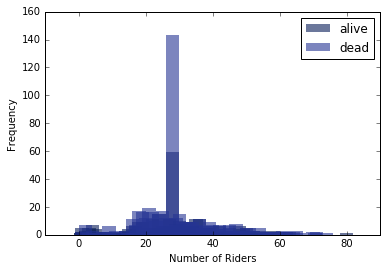

In [109]:
import thinkplot
import thinkstats2

live = data[data.Survived == 1]
dead = data[data.Survived == 0]

hist = thinkstats2.Hist(live.Age, label='alive')
thinkplot.Hist(hist, width=4)
hist = thinkstats2.Hist(dead.Age, label='dead')
thinkplot.Hist(hist, width=4)

thinkplot.Show(xlabel="Number of Riders", ylabel="Frequency")

KeyError: 0

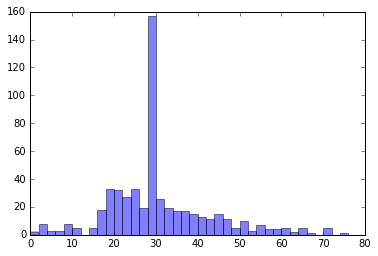

In [121]:
plt.hist(data[data.Survived != 1].Age, bins=np.arange(0,80,2), alpha=0.5)
plt.hist(data[data.Survived != 0].Age, bins=np.arange(0,80,5), alpha=0.5)
plt.legend(['casual','registered'])
plt.show()

In [89]:
data.groupby(['SibSp']).mean()

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


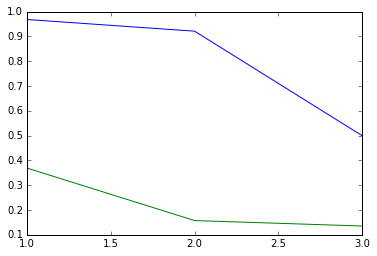

In [90]:
%matplotlib inline

females = data[data.Sex == 'female']
males = data[data.Sex == 'male']

plt.plot(females.groupby('Pclass').Survived.mean())
plt.plot(males.groupby('Pclass').Survived.mean())
plt.show()

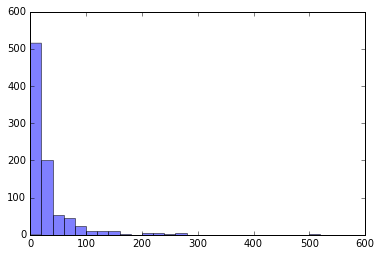

In [111]:
%matplotlib inline

plt.hist(data.Fare, bins=np.arange(0,600,20),alpha=0.5)
# plt.scatter(females.Fare, females.Survived)

# print males.Fare.value_counts().sort_index()

plt.show()